In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp 
import sklearn

In [4]:
path_to_file ='C:/Users/etusk/Documents/nyc-rolling-sales.csv'
df = pd.read_csv(path_to_file)

In [3]:
#Outcome Variable = Sale Price
#Categorical Variables = Neighborhood, Building Class
#Continuous Variables = Block, Gross Square Feet, Total Units 
#Research Question = What factors cause NYC building prices to rise? 
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,7/19/2017 0:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,12/14/2016 0:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,12/9/2016 0:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,9/23/2016 0:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,11/17/2016 0:00


In [6]:
df.columns = ['Unnamed: 0', 'borough', 'neighborhood','building_class category','tax_class_at_present', 'block', 'lot', 'ease_ment','building_class_at_present', 'address', 'apartment_number', 'zip_code',
       'residential_units', 'commercial_units', 'total_units','land_square_feet', 'gross_square_feet', 'year_built','tax_class_at_time_of_sale', 'building_class_at_time_of_sale',
       'sale_price', 'sale_date']

In [5]:
#Step 1 - Exploratory Analysis
print (df.shape) #84548 rows and 22 columns

(84548, 22)


In [6]:
print(df.describe())

         Unnamed: 0       borough         block           lot      zip_code  \
count  84548.000000  84548.000000  84548.000000  84548.000000  84548.000000   
mean   10344.359878      2.998758   4237.218976    376.224015  10731.991614   
std     7151.779436      1.289790   3568.263407    658.136814   1290.879147   
min        4.000000      1.000000      1.000000      1.000000      0.000000   
25%     4231.000000      2.000000   1322.750000     22.000000  10305.000000   
50%     8942.000000      3.000000   3311.000000     50.000000  11209.000000   
75%    15987.250000      4.000000   6281.000000   1001.000000  11357.000000   
max    26739.000000      5.000000  16322.000000   9106.000000  11694.000000   

       residential_units  commercial_units   total_units    year_built  \
count       84548.000000      84548.000000  84548.000000  84548.000000   
mean            2.025264          0.193559      2.249184   1789.322976   
std            16.721037          8.713183     18.972584    537.34

In [7]:
print(df.dtypes)

Unnamed: 0                         int64
borough                            int64
neighborhood                      object
building_class category           object
tax_class_at_present              object
block                              int64
lot                                int64
ease_ment                         object
building_class_at_present         object
address                           object
apartment_number                  object
zip_code                           int64
residential_units                  int64
commercial_units                   int64
total_units                        int64
land_square_feet                  object
gross_square_feet                 object
year_built                         int64
tax_class_at_time_of_sale          int64
building_class_at_time_of_sale    object
sale_price                        object
sale_date                         object
dtype: object


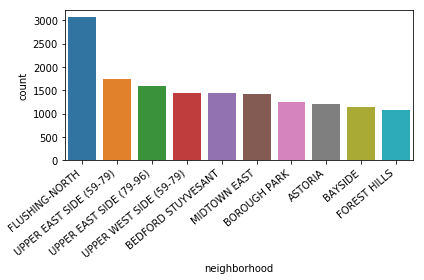

In [8]:
ax = sns.countplot(x="neighborhood", data=df, order=pd.value_counts(df['neighborhood']).iloc[:10].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

#Part of Exploratory Analaysis - uses a bar plot to show one categorical vs continuous 
#Counts how many buildings are in each neighborhood up to ten neighborhoods

In [5]:
#Changing Variable types so that they align 
df['sale_price'] = pd.to_numeric(df['sale_price'], errors='coerce')
df['land_square_feet'] = pd.to_numeric(df['land_square_feet'], errors='coerce')
df['gross_square_feet']= pd.to_numeric(df['gross_square_feet'], errors='coerce')
df['tax_class_at_time_of_sale'] = df['tax_class_at_time_of_sale'].astype('category')
df['tax_class_at_present'] = df['tax_class_at_present'].astype('category')

In [6]:
#SALE DATE is object but should be datetime #Part of Data Cleaning
df['sale_date']    = pd.to_datetime(df['sale_date'], errors='coerce')
df['sale_year']    = df['sale_date'].dt.year
df['sale_month']   = df['sale_date'].dt.month
df['sale_quarter'] = df['sale_date'].dt.quarter
df['sale_day']     = df['sale_date'].dt.day
df['sale_weekday'] = df['sale_date'].dt.weekday

In [7]:
df = df.drop_duplicates(df.columns, keep='last')#deleting duplicates #Part of Data Cleaning 

In [8]:
#deleted null values 
df = df[df['sale_price'].notnull()]

In [9]:
df = df[(df['sale_price'] > 100000) & (df['sale_price'] < 5000000)]

# Removes all NULL values
df = df[df['land_square_feet'].notnull()] 
df = df[df['gross_square_feet'].notnull()] 

# Keeps properties with fewer than 20,000 Square Feet, which is about 2,000 Square Metres
df = df[df['gross_square_feet'] < 20000]
df = df[df['land_square_feet'] < 20000]

In [48]:
#Step 2: Data Cleaning 
#Change Column Names - Changed intiallu 
#Limit number of rows, units, prices, etc. 
#Drop N/A Values 

In [10]:
#Step 2: Data Cleaning
# deleting the Unnamed column
del df['Unnamed: 0']

In [ ]:
#g = sns.catplot(x="sale_price", y="borough", hue="neighborhood", data=df,
                #height=6, kind="bar", palette="muted")
#g.despine(left=True)
#g.set_ylabels(" ")

In [ ]:
(df['borough'].value_counts().head() / len(df)).plot.bar()

In [9]:
#Step 3: Feature Engineering 
#1: Domain knowledge - Downtown Manhattan is a hip area and real estate prices are likely high - group by downtown manhattan 

dictionary = {'ALPHABET CITY':'Downtown Manhattan', 'FINANCIAL DISTRICT':'Downtown Manhattan', 'CIVIC CENTER':'Downtwon Manhattan',
            'CHELSEA':'Downtown Manhattan', 'CHINATOWN':'Downtown Manhattan', 'CIVIC CENTER':'Downtown Manhattan', 'EAST VILLAGE': 'Downtown Manhattan', 'FASHION': 'Downtown Manhattan',
                                'FINANCIAL' : 'Downtown Manahattan', 'WEST VILLAGE':'Downtown Manhattan'}   
#iter_items is a function for key and value pairs 
for k,v in dictionary.iteritems():
    row_indexes=df[df['neighborhood']== (key)].index 
    df.loc[row_indexes,'region']==(value)
#df = df.assign(regions=regions.values)

print[df['region']]



AttributeError: 'dict' object has no attribute 'iteritems'

In [ ]:
#2: Review Sales by season 
df['winter'] = df.loc[df['sale_month']=='12']
print(df['sale_month'].head())
#df['spring']
#df['fall']
#df['summer']
while True:
    date=int(input(df['sale_month']))
    season=""
if date<=3:
    season='winter'
elif date>3 or <=6:
    season='spring'
elif date>6 or <=8:
    season='summer'
elif date>8 or <11:
    season= Fall
else:

df['season'] = season


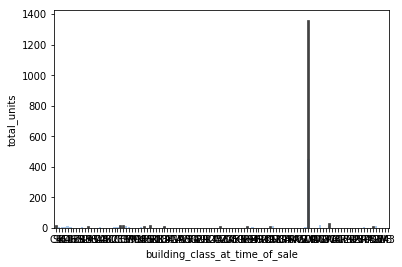

In [11]:
#3: Combine sparse values - Total Units 
sns.set_color_codes("pastel")
sns.barplot(x="building_class_at_time_of_sale", y="total_units", data=df,
            label="Total", color="b")
#how to choose values for certain graphs - to change x axis is it just iloc? 

#4: Combine sparse values - Residential Units 
#5: Combine sparse values - Commercial Units 
#6: Create building square feet - Gross - Land 
#7: Group Building Class Category 
#8:
#9:
#10:

In [ ]:
#Step 4: Filtering Methods #Use .filter method to figure out the best feature - PCA?  